<a href="https://colab.research.google.com/github/alanexplorer/Dependability-Modeling/blob/master/FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo para Transformada Rápida de Fourier

### Alan Pereira da Silva

## Resumo

A transformada de Fourier é uma função que relaciona o dominío do tempo com o dominío da frequência de um sinal:

In [0]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import scipy.fftpack

In [0]:
# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y1 = 1.5*np.sin(20.0 * 2.0*np.pi*x)


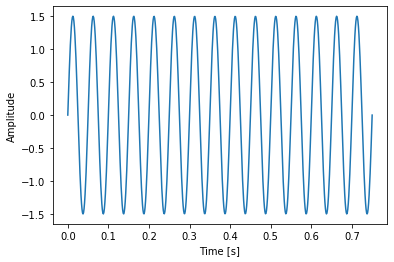

In [3]:
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(x, y1)
plt.show()

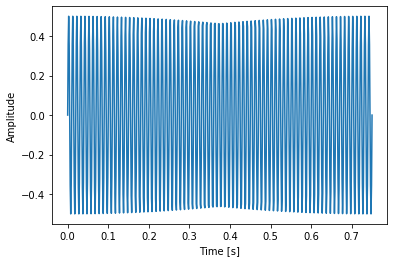

In [4]:
y2 = 0.5*np.sin(100.0 * 2.0*np.pi*x)
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(x, y2)
plt.show()

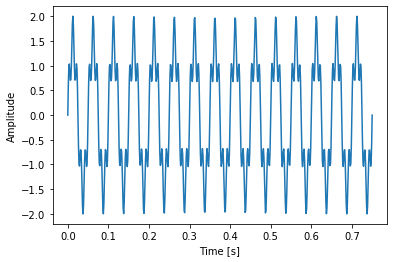

In [5]:
y = y1+y2

plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(x, y)
plt.show()

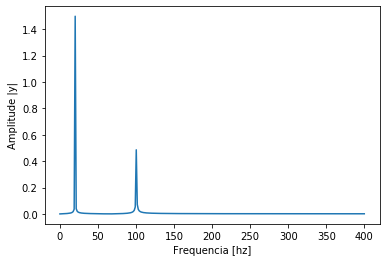

In [6]:
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.ylabel("Amplitude |y|")
plt.xlabel("Frequencia [hz]")
plt.show()

# Implementação do FFT a partir do DFT

A Transformada Discreta de Fourier (DFT), é definida como:
$$ X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-j~2\pi~k~n~/~N}$$

A transformação de $ x_n \to X_k$ é uma translação do tempo para frequência.
$$\vec{X} = M \cdot \vec{x}$$
Com a matriz M dado por:
$$M_{kn} = e^{-j~2\pi~k~n~/~N}$$

In [0]:
def DFT(y):
    N = len(y) # retorna o tamanho do array
    y = np.asarray(y, dtype=float) # converte uma lista em array
    n = np.arange(N) # retorna um array de 0 à N-1
    k = n.reshape((N, 1)) # retorna um array com N linhas e uma coluna
    M = np.exp(-2j*pi*k*n/N) #calcula a exponecial de cada elemento do array
    return np.dot(M, y)

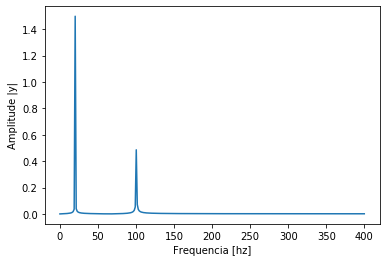

In [8]:
yf = DFT(y)
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.ylabel("Amplitude |y|")
plt.xlabel("Frequencia [hz]")
plt.show()

## Simetria

James William Cooley e John Wilder Tukey mostraram que é possivél dividir o cálculo da DFT duas partes

\begin{align}
X_k &= \sum_{n=0}^{N-1} x_n \cdot e^{-i~2\pi~k~n~/~N} \\
    &= \sum_{m=0}^{N/2 - 1} x_{2m} \cdot e^{-i~2\pi~k~(2m)~/~N} + \sum_{m=0}^{N/2 - 1} x_{2m + 1} \cdot e^{-i~2\pi~k~(2m + 1)~/~N} \\
    &= \sum_{m=0}^{N/2 - 1} x_{2m} \cdot e^{-i~2\pi~k~m~/~(N/2)} + e^{-i~2\pi~k~/~N} \sum_{m=0}^{N/2 - 1} x_{2m + 1} \cdot e^{-i~2\pi~k~m~/~(N/2)}
\end{align}

In [0]:
def zero_pad_to_nearest_n_square(a):
    return np.pad(a, (0, int(2**np.ceil(np.log2(len(a))) - len(a))), 'constant')

In [0]:
def fft(x):
    N = len(x)
    if N <= 4:
        return DFT(x)
    X_even = fft(x[::2]) # retorna a posição 0, 2, 4, 6 ... n
    X_odd = fft(x[1::2]) # retorna a posição 1, 3, 5, 7 ... n+1
    
    factor = np.exp(-2j * np.pi * np.arange(N) / N)
    
    #concatena os dois arrays
    
    return np.concatenate([X_even + factor[:N//2] * X_odd, X_even + factor[N//2:] * X_odd])

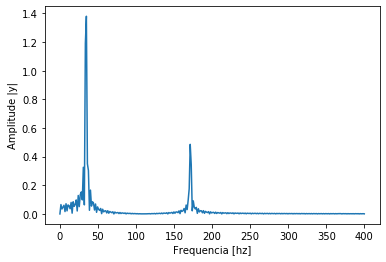

In [11]:
yf = fft(zero_pad_to_nearest_n_square(y))
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.ylabel("Amplitude |y|")
plt.xlabel("Frequencia [hz]")
plt.show()

# Teste

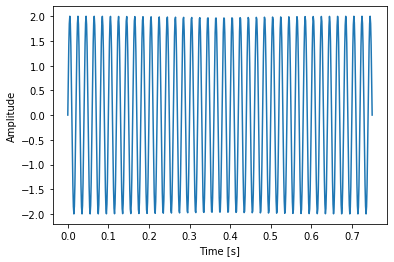

In [12]:
# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = 2*np.sin(50.0 * 2.0*pi*x)

plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(x, y)
plt.show()

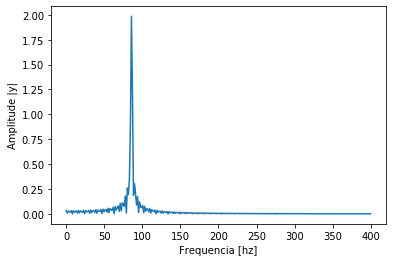

In [13]:
yf = fft(zero_pad_to_nearest_n_square(y))
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.ylabel("Amplitude |y|")
plt.xlabel("Frequencia [hz]")
plt.show()

## Referência

https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm <br/>
https://towardsdatascience.com/fast-fourier-transform-937926e591cb

In [0]:
from google.colab import drive
drive.mount('/content/drive')